# Лабораторная работа №5 (Ким Д.В., группа БПМ-151)
## РЕШЕНИЕ  СИСТЕМ  ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ ИТЕРАЦИОННЫМИ МЕТОДАМИ 
### Вариант 13

## Задача 1

Дана  система уравнений  $Ax = b$. Найти решение  системы  с помощью метода Гаусса. Выполнить $10$ итераций по методу Зейделя. Принимая решение,  полученное с помощью метода Гаусса  за точное, найти величину абсолютной погрешности итерационного решения. 
$A =  \begin{bmatrix}
   2.97 & 0.4 & 0.3 & 1.98 & 0 & 0.1 \\    
   0.99 & 4.9 & 0.4 & 2.97 & 0.2 & -0.3 \\
   0 & -1.8 & 6.6 & 3.3 & 0.6 & 0.8 \\
   4.95 & 1.6 & 1.2 & 8.91 & 0.8 & 0.3 \\
   1.98 & -1.5 & 0.4 & -1.98 & 6.1 & 0 \\
   9.9 & 1.4 & 2.4 & 5.94 & 3.2 & 23.3       
   \end{bmatrix}
$

$ b =\begin{bmatrix}
4.69 \\
12.18 \\
-3.64 \\
21.05 \\
0.42 \\
-13.91
\end{bmatrix}
$

In [1]:
import numpy as np
from math import sqrt
from numpy.linalg import solve, norm
import matplotlib.pyplot as plt

import time
from tqdm import *

%matplotlib inline

In [2]:
A = np.array([[2.97, 0.4, 0.3, 1.98, 0, 0.1], 
              [0.99, 4.9, 0.4, 2.97, 0.2, -0.3], 
              [0, -1.8, 6.6, 3.3, 0.6, 0.8], 
              [4.95, 1.6, 1.2, 8.91, 0.8, 0.3], 
              [1.98, -1.5, 0.4, -1.98, 6.1, 0], 
              [9.9, 1.4, 2.4, 5.94, 3.2, 23.3]])
b = np.array([[-73.34],
              [-37.456],
              [-126.316],
              [-82.528],
              [96.66],
              [7.41]])

Зададим функцию для красивого отображения матриц.

In [3]:
def draw_matrix(_A, ax, precision = 10):
    
    res = ax.imshow(np.array(_A), cmap=plt.cm.Pastel1_r, interpolation='nearest')

    width, height = _A.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(_A[x, y])[:precision], xy=(y, x), horizontalalignment='center', verticalalignment='center')

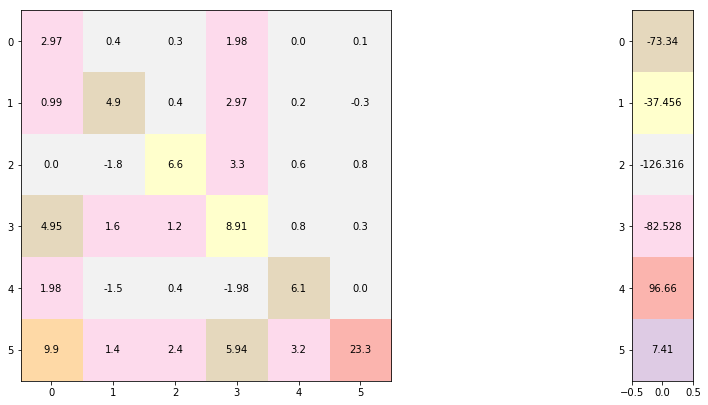

In [4]:
fig = plt.figure(figsize=(15, 15))

# отобразим матрицу А
ax = fig.add_subplot(221)

draw_matrix(A, ax, precision=17)
    
ax = fig.add_subplot(222)

# отображаем вектор b
draw_matrix(b, ax)

С помощью встроенной в $numpy$ функции $solve$ найдем истинное решение

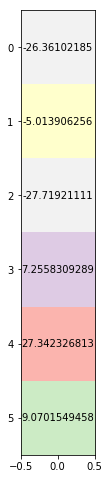

In [5]:
x_true = solve(A, b)
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(222)

draw_matrix(x_true, ax, precision = 12)

**Преобразуем систему $Ax=b$ к виду $x=Bx+c$, удобному для итераций.** <br/>
Как говорит нам учебник Амосова: <br/>
"Для того чтобы применить метод простой итерации к решению СЛАУ $ Ax = b$ с квадратной невырожденной матрицей $A$ необходимо преобразовать систему к виду: $$\large x = Bx + c\qquad (1)$$
где $\large B$ - квадратная матрица с элементами $\large b_{i, j}, i, j = 1, ... , n$,

$\large c$ - вектор-столбец с элементами $\large c_{i}, i = 1, ..., n$

В развернутой форме система (1) примет вид:

$$\large x_{1} = b_{1,1}x_{1} + b_{1,2}x_{2} + b_{1,3}x_{3} + ... + b_{1, n}x_{n} + c_{1},$$$$\large x_{2} = b_{2,1}x_{1} + b_{2,2}x_{2} + b_{2,3}x_{3} + ... + b_{2, n}x_{n} + c_{2},$$$$\large \dotsb \quad \dotsb \quad \dotsb \quad \dotsb \quad \dotsb$$$$\large x_{n} = b_{n,1}x_{1} + b_{n,2}x_{2} + b_{n,3}x_{3} + ... + b_{n, n}x_{n} + c_{n},$$
Вообще говоря данная операция приведения к виду удобному для итераций не является простой и требует специальных знаний о специфике системы.
Самый простой способ состоит в следующем:

$\large x_{1} = a_{1,1}^{-1}(b_{1} - a_{1,2}x_{1} - a_{1,3}x_{2} - a_{1,3}x_{3} - ... - a_{1,n}x_{n})$ - из первого уравнения системы выражаем $x_{1}$,

$\large x_{2} = a_{2,2}^{-1}(b_{2} - a_{2,1}x_{1} - a_{2,3}x_{2} - a_{3,3}x_{3} - ... - a_{3,n}x_{n})$ - из первого уравнения системы выражаем $x_{3}$,

Продолжаем выражать корни и получаем систему:

$$\large x_{1} = \qquad\quad b_{1,2}x_{2} + b_{1,3}x_{3} + \dotsb + b_{1, n}x_{n} + c_{1},$$$$\large x_{2} = b_{2,1}x_{1} + \qquad\quad b_{2,3}x_{3} + \dotsb + b_{2, n}x_{n} + c_{2},$$$$\large x_{3} = b_{3,1}x_{1} + b_{3,2}x_{2}  \qquad\quad + \dotsb + b_{2, n}x_{n} + c_{2},$$
$\qquad\qquad \qquad\qquad \qquad\qquad \qquad\qquad  \dotsb \quad \dotsb \quad \dotsb \quad \dotsb \quad \dotsb \qquad\qquad \qquad\qquad (2) $ $$\large x_{n} = b_{n,1}x_{1} + b_{n,2}x_{2} + b_{n,3}x_{3} + \dotsb \qquad\quad +c_{n},$$ в которой на главной диагонали стоят нулевые элементы.Остальные выражаются по формулам: $\large b_{i, j} = \frac{-a_{i, j}}{a_{i, i}}, c_{i} = \frac{b_{i}}{a_{i, i}}, \quad i,j = 1, ..., n, i\neq j  \quad\quad (3)$

Конечно для выполнения данного преобразования необходимо, чтобы диагональные элементы матрицы $А$ были не нулевыми".

Зададим функцию, которая раскладывает матрицу $A$ c ненулевыми диагональными элементами на верхнетреугольную матрицу $B_2$ и нижнетреугольную матрицу $B_1$.

In [6]:
def transform(A, b):
    B1, B2 = np.zeros_like(A), np.zeros_like(A)
    c = np.zeros_like(b)
    for i in range(len(A)):
        B1[i, :i] = -A[i, :i]/A[i, i]
        B2[i, i+1:] = -A[i, i+1:]/A[i, i]
        c[i] = b[i]/A[i, i]
    return B1, B2, c

Приведем данную нам систему $Ax=b$ к итерируемому виду с помощью написанной функции $transform$. 

In [7]:
B1, B2, c = transform(A, b)

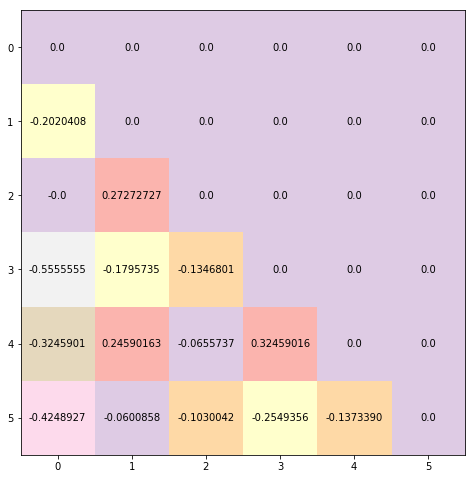

In [8]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(222)
draw_matrix(B1, ax)

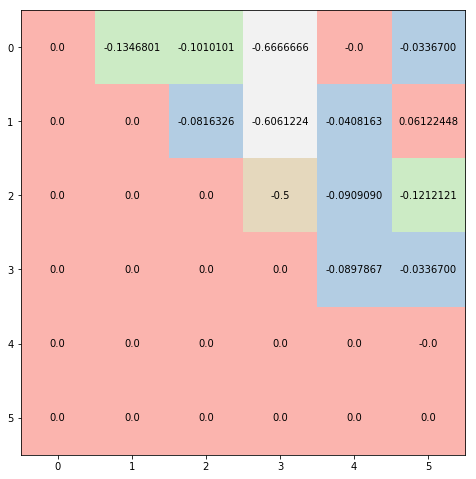

In [9]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(221)
draw_matrix(B2, ax)

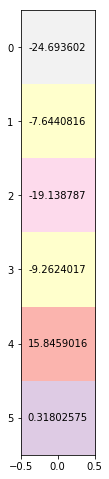

In [10]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(212)
draw_matrix(c, ax)

Теперь следует проверить выполнение достаточного условия сходимости итерационных методов: 
<h1><center>$||B||_{\infty} < 1$</center></h1>

In [11]:
B_norm = norm(B1+B2, ord=np.inf)
print(B_norm < 1)

True


Зададим функцию, реализующую метод Гаусса-Зейделя. 
Внтури нее будем вызывать уже написанную функцию $transform(A,b)$: так удобнее работать с изначальной системой.

In [12]:
def gase(A, b, x0, n=100, eps=0):
    B1, B2, c = transform(A, b) # приводим систему к итерационному виду
    B = B1 + B2
    pbar = tqdm_notebook(total = 1000) # будем считать итерации
    
    x = np.copy(x0)
    eps2 = eps*(1 - np.linalg.norm(B1+B2, np.inf))/np.linalg.norm(B2, np.inf)

    for k in range(n):
        x_new = np.copy(x)
        pbar.update(1)
        for i in range(B.shape[0]):
            s1 = np.dot(B[i, :i], x_new[:i])
            s2 = np.dot(B[i, i + 1:], x[i + 1:])
            x_new[i] = c[i] + s1 + s2
            converge = np.linalg.norm((x_new - x), ord=2) < eps2
        if converge:
                return x_new
        x = x_new 
    return x

In [13]:
x0 = np.zeros_like(c)
x_10 = gase(A, b, x0, 10, eps=0)

Принимая решение, полученное методом $linalg.solve(A, b)$, за точное, найдем величину абсолютной погрешности итерационного решения (используя норму $||\cdot||_{\infty}$). 

In [14]:
print('Решение встроенным методом (истинное):\n {0}'.format(x_true.flatten().T))
print('Решение методом Гаусса-Зейделя за 10 итераций для x0 ={0}:\n {1}'.format(x0.tolist(), x_10.flatten().T))
print('Ошибка:\n{0}'.format(norm((x_true-x_10), ord=np.inf)))

Решение встроенным методом (истинное):
 [-26.36102185  -5.01390626 -27.71921112   7.25583093  27.34232681
   9.07015495]
Решение методом Гаусса-Зейделя за 10 итераций для x0 =[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]:
 [-26.36099801  -5.01388625 -27.7191806    7.25581306  27.34231619
   9.07014649]
Ошибка:
3.0514566550010613e-05


Теперь нам нужно взять *любое другое* начальное приближение и объяснить полученные результаты. 

In [15]:
x0 = np.ones_like(b)
x_1 = gase(A, b, x0, 10)

In [16]:
print('Решение встроенным методом (истинное):\n {0}'.format(x_true.flatten().T))
print('Решение методом Гаусса-Зейделя за 10 итераций для x0 ={0}:\n {1}'.format(x0.tolist(), x_1.flatten().T))
print('Ошибка:\n{0}'.format(norm((x_true-x_1), ord=np.inf)))

Решение встроенным методом (истинное):
 [-26.36102185  -5.01390626 -27.71921112   7.25583093  27.34232681
   9.07015495]
Решение методом Гаусса-Зейделя за 10 итераций для x0 =[[1.0], [1.0], [1.0], [1.0], [1.0], [1.0]]:
 [-26.36099564  -5.01388322 -27.7191745    7.25581095  27.34231509
   9.07014536]
Ошибка:
3.661420762313128e-05


Ошибка немного больше, т.к. приближение фактически так же удалено от истинного ответа $x_true$, как и нулевое.

In [17]:
x0 = np.array([[-26.0], [-5.0], [-27.0], [7.2], [27.3], [9.0]])
x_close = gase(A, b, x0, 10)

In [18]:
print('Решение встроенным методом (истинное):\n {0}'.format(x_true.flatten().T))
print('Решение методом Гаусса-Зейделя за 10 итераций для x0 ={0}:\n {1}'.format(x0.tolist(), x_close.flatten().T))
print('Ошибка:\n{0}'.format(norm((x_true-x_close), ord=np.inf)))

Решение встроенным методом (истинное):
 [-26.36102185  -5.01390626 -27.71921112   7.25583093  27.34232681
   9.07015495]
Решение методом Гаусса-Зейделя за 10 итераций для x0 =[[-26.0], [-5.0], [-27.0], [7.2], [27.3], [9.0]]:
 [-26.36102162  -5.01390602 -27.7192107    7.25583074  27.34232671
   9.07015485]
Ошибка:
4.1627773939012513e-07


Ошибка на 2 порядка меньше, т.к. мы взяли достаточно точное приближение к истинному решению системы $x_true$, и за 10 итераций сильнее приблизились к истинному ответу.

## Задача 2
Для системы уравнений $\large Ax=b$ из задачи 1 найти решение по методу Зейделя с точностью $\large \varepsilon = 10^{-6}$, взяв *любое* начальное приближение. Подсчитать количество итераций до сходимости.

In [19]:
x0 = np.zeros_like(c)
x_eps = gase(A, b, x0, eps=1e-6)
x_eps

array([[-26.36102185],
       [ -5.01390626],
       [-27.71921112],
       [  7.25583093],
       [ 27.34232681],
       [  9.07015495]])

In [20]:
print('Решение встроенным методом (истинное):\n {0}'.format(x_true.flatten().T))
print('Решение методом Гаусса-Зейделя с начальным приближением x_ones = {0} и точностью epsilon = 10^(-6):\n {1}'.format(x0.tolist(), x_eps.flatten().T))
print('Ошибка:\n{0}'.format(norm((x_true-x_eps), ord=np.inf)))

Решение встроенным методом (истинное):
 [-26.36102185  -5.01390626 -27.71921112   7.25583093  27.34232681
   9.07015495]
Решение методом Гаусса-Зейделя с начальным приближением x_ones = [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0]] и точностью epsilon = 10^(-6):
 [-26.36102185  -5.01390626 -27.71921112   7.25583093  27.34232681
   9.07015495]
Ошибка:
1.3963941114525369e-09
